In [1]:
import os

os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.models import Sequential, Model
from keras.layers import Dense, Input, LSTM, Dropout, Concatenate, Lambda
from keras.callbacks import ModelCheckpoint
from keras.saving import load_model

from keras import backend as K

from sklearn.preprocessing import MinMaxScaler

from pathlib import Path
from scripts.process_dataset import read_dataset_seq2seq
from utils import draw_prediction, plot_loss


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [7]:
def create_model(latent_dim, window_len, forecast_len, n_states, n_patches):
    encoder_inputs = Input(shape=(window_len, n_states*n_patches))
    encoder = LSTM(latent_dim, return_state=True)
    encoder_outputs, state_h, state_c = encoder(encoder_inputs)

    decoder_inputs = Input(shape=(forecast_len, n_patches))
    decoder_lstm = LSTM(latent_dim, return_sequences=True)
    x = decoder_lstm(decoder_inputs, initial_state=[state_h, state_c])
    x = Dense(512, activation='relu')(x)
    output = Dense((n_states-1)*n_patches, activation="relu")(x)
    print(output.shape)

    model = Model([encoder_inputs, decoder_inputs], output)

    return model


In [22]:
window_len = 20
forecast_len = 50
nb_patches = 10
past, deterministic_future, future = read_dataset_seq2seq("../dataset/toto/train", window_len, forecast_len, nb_patches)

In [11]:
future.shape

(702, 60, 70)

In [23]:
tf.keras.backend.clear_session()
model = create_model(512, window_len, forecast_len, 8, nb_patches)
model.compile(optimizer="adam", loss="mean_squared_error")


(None, 50, 70)


In [26]:

model.fit([past, deterministic_future], future, epochs=100, batch_size=20, validation_split=0.2)


Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0242 - val_loss: 0.0242
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0244 - val_loss: 0.0246
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0246 - val_loss: 0.0242
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0244 - val_loss: 0.0245
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0245 - val_loss: 0.0241
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0242 - val_loss: 0.0241
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0242 - val_loss: 0.0244
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0244 - val_loss: 0.0242
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0242 - val_loss: 0.0242
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0244 - val_loss: 0.0241
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0242 - val_loss: 0.0251
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 

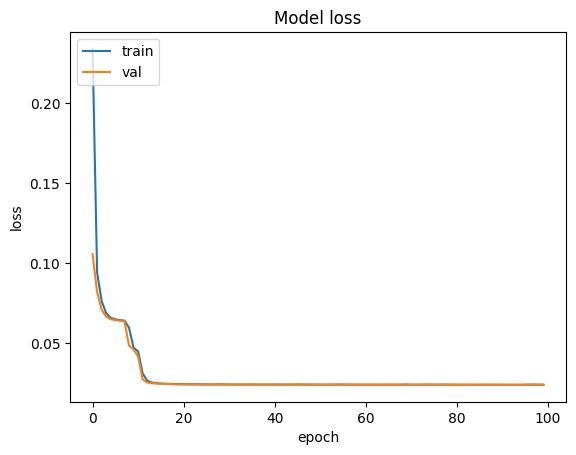

In [25]:
plot_loss(model)

In [ ]:
real, pred = moving_predict(X_trans, model_lookback, scaler, LOOKBACK, 80)
real = scaler.transform(real)
pred = scaler.transform(pred)
print(np.mean(np.square(real-pred)))

In [ ]:
draw_prediction(real, pred, 0)